<a href="https://colab.research.google.com/github/Youngpyoryu/Ezen_academy/blob/main/07_23_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


데이터는 크게 (1) 명목형 또는 순서형의 범주형 데이터 (categorical data)와 (2) 연속형 데이터 (continuous data) 로 구분할 수 있습니다.  R에서는 범주형 데이터를 요인(factor)형 데이터 구조라고 부르고 있으며, 순서(order)가 있는 경우는 순서형 요인(ordered factor)라고 해서 구분하기도 합니다.

 

분석하고자 하는 데이터 셋을 받으면 제일 먼저 데이터 구조와 데이터 형태를 탐색하게 됩니다.  그리고 분석 목적과 시나리오에 따라서 변수를 변환하게 되지요.  이번 포스팅에서는 연속형 변수를 범주형 변수로 변환하는 3가지 방법에 대해서 알아보도록 하겠습니다.  통계기법 중 도수분포표, 교차분할표, 카이제곱 검정이라든지, 로지스틱회귀분석, 그래프 중 막대그림, 원그림, 점그림 등의 경우 범주형 변수로 변환을 해야만 하며, 데이터 탐색 시에도 범주형 변수로 변환하여 분포 형태나 집단 간 비교를 하게 되므로 이번 포스팅은 활용도가 매우 높다고 하겠습니다.

 

cut() 함수, ifelse() 함수, within() 함수를 이용해서 아래 예를 들어 설명하도록 하겠습니다.



출처: https://rfriend.tistory.com/38 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

(1) Cut

In [52]:
%%R

#통계시험 점수(stats_score)

student_id<-c("s01", "s02", "s03", "s04", "s05", "s06", "s07", "s08", "s09", "s10")
stat_score<-c(56,94,82,79,64,82,78,80,76,78)

In [53]:
%%R
mean(stat_score)

[1] 76.9


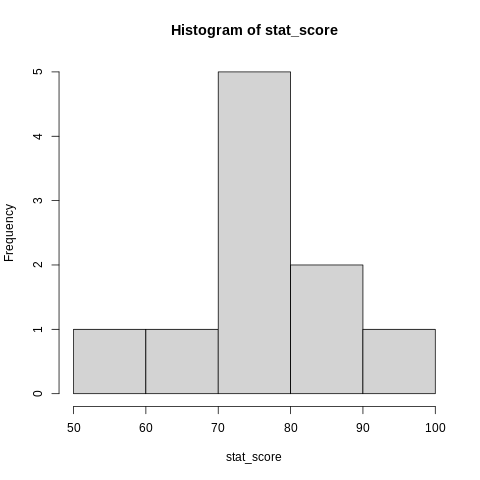

In [54]:
%%R
hist(stat_score)

In [55]:
%%R
#데이터 프레임 생성
score_d.f<-data.frame(student_id,stat_score)
score_d.f

   student_id stat_score
1         s01         56
2         s02         94
3         s03         82
4         s04         79
5         s05         64
6         s06         82
7         s07         78
8         s08         80
9         s09         76
10        s10         78


In [56]:
%%R
rm(studeint_id, stat_score)

위의 통계시험 성적을 가지고 cut() 함수를 이용하여 "수", "우", "미", "양", "가" 등급을 매겨보도록 하겠습니다.

right = TRUE 옵션을 주면 a < x <= b  와 같이 오른쪽 숫자까지 포함하여 해당 등급을 부여하게 됩니다.

right = FALSE 옵션을 주면 a<= x <b 의 조건으로 등급을 부여하며, include.lowest = TRUE 옵션을 주면 구성요소 값이 최소값과 같아도 변환을 시키게 됩니다.

In [57]:
%%R
##cut()

score_d.f <- transform(score_d.f,
                       stat_score_1 = cut(stat_score, breaks = c(0, 60, 70, 80, 90, 100),
                                          include.lowest = TRUE, 
                                          right = FALSE, 
                                          labels = c("가", "양", "미", "우", "수")
                                         ), 
                      stat_score_2 = cut(stat_score, breaks = c(0, 60, 70, 80, 90, 100), 
                                         include.lowest = FALSE, 
                                         right = FALSE, 
                                         labels = c("가", "양", "미", "우", "수")
                                         ),
                      stat_score_3 = cut(stat_score, breaks = c(0, 60, 70, 80, 90, 100), 
                                         include.lowest = FALSE, 
                                         right = TRUE, 
                                        labels = c("가", "양", "미", "우", "수")
                                        ), 
                      stat_score_4 = cut(stat_score, breaks = c(0, 60, 70, 80, 90, 100),
                                         include.lowest = TRUE, 
                                         right = TRUE,  
                                         labels = c("가", "양", "미", "우", "수")
                                        )
                        )

score_d.f

   student_id stat_score stat_score_1 stat_score_2 stat_score_3 stat_score_4
1         s01         56           가           가           가           가
2         s02         94           수           수           수           수
3         s03         82           우           우           우           우
4         s04         79           미           미           미           미
5         s05         64           양           양           양           양
6         s06         82           우           우           우           우
7         s07         78           미           미           미           미
8         s08         80           우           우           미           미
9         s09         76           미           미           미           미
10        s10         78           미           미           미           미


그런데 사용하다 보면 right 옵션, include.right 옵션, 그리고 labels 부여하는 순서도 그렇고, 머리속이 복잡해집니다. 아래의 ifelse()나 within() 함수는 위의 cut()보다는 수식의 부호를 직접 입력한다는 측면에서 사용하기에 더 편하고 직관적인 면이 있습니다.


(2) ifelse()

In [58]:
%%R
attach(score_d.f)

score_d.f <- transform(score_d.f, 
           stat_score_5 = ifelse(stat_score < 60, "가", 
                                 ifelse(stat_score >= 60 & stat_score < 70, "양", 
                                 ifelse(stat_score >= 70 & stat_score < 80, "미", 
                                 ifelse(stat_score >= 80 & stat_score < 90, "우", "수"
                                 ))))
                          )
detach(score_d.f)
score_d.f


R[write to console]: The following object is masked _by_ .GlobalEnv:

    student_id




   student_id stat_score stat_score_1 stat_score_2 stat_score_3 stat_score_4
1         s01         56           가           가           가           가
2         s02         94           수           수           수           수
3         s03         82           우           우           우           우
4         s04         79           미           미           미           미
5         s05         64           양           양           양           양
6         s06         82           우           우           우           우
7         s07         78           미           미           미           미
8         s08         80           우           우           미           미
9         s09         76           미           미           미           미
10        s10         78           미           미           미           미
   stat_score_5
1            가
2            수
3            우
4            미
5            양
6            우
7            미
8            우
9            미
10           미


In [59]:
%%R
class(score_d.f$stat_score_5)

[1] "character"


위 표의 제일 오른쪽에 'stat_score_5' 변수가 ifelse() 함수를 이용해서 만든 범주형 변수가 되겠습니다.  cut() 대비 수식 등호, 부등호를 직접 입력하니 직관적으로 분석가가 원하는 범주로 수식을 적을 수 있는 장점이 있습니다만, 범주의 수준(level)이 많아질 수록 괄호 열고 닫는데 유의해야 합니다.  위의 예제의 경우 5개 범주로 나누는데 괄호 열고 "(((("  닫는 것이 "))))" 총 4개가 사용이 되었네요.  갯수 조심하지 않으면 콘솔 창에 에러날거예요.  RStudio 사용하면 ifelse() 괄호 하나씩 더해갈 때 마다 괄호 닫는것도 저절로 생기니 차근 차근 하시면 될겁니다.

 

그리고 stat_score_5 의 속성(class)이 요인(factor)이 아닌 문자(character)로 되어 있습니다.  만약 요인별로 통계 분석을 하고자 한다면 as.factor() 함수로 문자형을 요인형으로 먼저 변환을 시킨 후에 분석을 진행해야 합니다.

(3) within()

In [60]:
%%R
score_d.f <- within( score_d.f, {
    stat_score_6 = character(0) 
    stat_score_6[ stat_score < 60 ] = "가" 
    stat_score_6[ stat_score >=60 & stat_score < 70 ] = "양" 
    stat_score_6[ stat_score >=70 & stat_score < 80 ] = "미" 
    stat_score_6[ stat_score >=80 & stat_score < 90 ] = "우" 
    stat_score_6[ stat_score >=90 ] = "수" 
    
    stat_score_6 = factor(stat_score_6, level = c("수", "우", "미", "양", "가"))
  })

In [61]:
%%R
score_d.f$stat_score_6

 [1] 가 수 우 미 양 우 미 우 미 미
Levels: 수 우 미 양 가


within() 함수는 먼저 새로 만들 변수 stat_score_6 = character(0)  이라고 해서 문자형 변수라고 신규생성/지정을 해주고 시작합니다.

수식 등호, 부등호로 구간 설정하구요, 제일 마지막 줄에 factor() 함수로 해서 level = c("수", "우", "미", "양", "가") 라고 해서 수준을 지정해 줄 수 있습니다.  성적은 순서(order)가 있으므로 level 에 지정한 순서가 stat_score_6 요인 변수의 level 순서가 되겠습니다.

 

score_d.f$stat_score_6  라고 해서 indexing을 해서 보면 제일 아랫줄에 "Levels: 수 우 미 양 가" 라고 해서 순서가 제대로 인식되어 있음을 알 수 있습니다.  개인적으로 within() 함수를 순서형 요인변수 만들 때 위 셋 중에서 가장 많이 사용하는 편입니다.

 

아래는 제일 오른쪽에 within()함수로 만든 stat_score_6 변수까지 모두 한꺼번에 열어본 score_d.f 데이터 프레임이 되겠습니다. 

# IRIS data를 이용하여 의사결정나무(Decision Tree) 모형 실습하기

의사결정 나무는 간단하게 말해서 if~else와 같이 특정 조건을 기준으로 O/X로 나누어 분류/회귀를 진행하는 tree구조의 분류/회귀 데이터마이닝 기법이다.

 이해도가 매우 높고 직관적이라는 장점이 있다. 그렇기에 많이 사용되며, 의사결정나무도 많은 머신러닝 기법과 동일하게 종속변수의 형태에 따라 분류와 회귀 문제로 나뉜다.

 종속변수가 범주형일 경우 Decision Tree Classification으로 분류를 진행하고, 종속변수가 연속형일 경우 Decision Tree Regression으로 회귀를 진행한다. 

rpart : # Decision Tree 분석 및 시각화를 위한 패키지

In [62]:
%%R
install.packages('rpart')
#라이브러리 load
library(rpart)

#Decision Tree 모델 생성
c<-rpart(Species~., data = iris)
c

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rpart_4.1-15.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 639286 bytes (624 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *


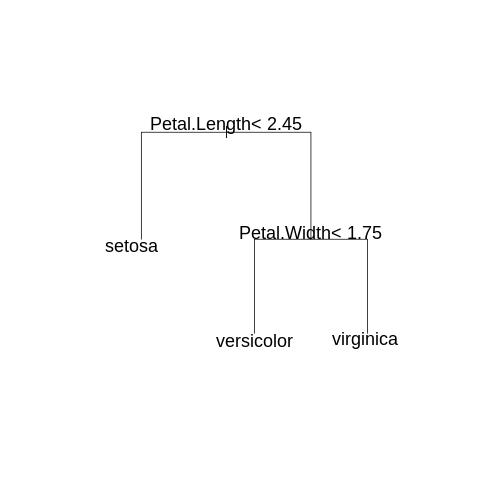

In [63]:
%%R
# 시각화
plot(c, compress=T, margin=0.3)
text(c, cex=1.5)

In [64]:
%%R
# 예측
head(predict(c, newdata = iris, type = "class"))
tail(predict(c, newdata = iris, type = "class"))

      145       146       147       148       149       150 
virginica virginica virginica virginica virginica virginica 
Levels: setosa versicolor virginica


 위의 newdata에는 기존의 iris데이터를 동일하게 넣었다. 실습의 편의상 이렇게 진행한다. 만약 데이터를 train/test로 분리를 시킨 상태에서 진행한다면 newdata 부분에 test데이터를 넣으면 될 것이다. 

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rpart.plot_3.0.9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 671600 bytes (655 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

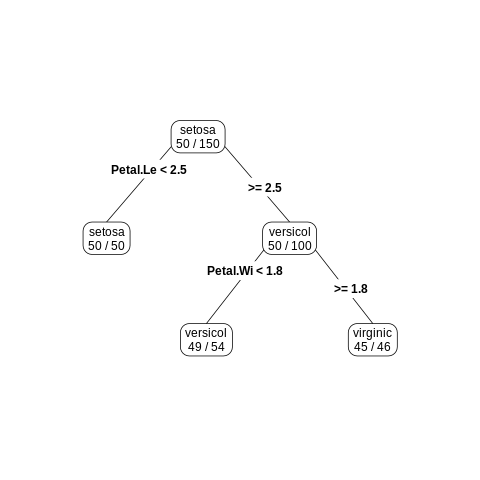

In [65]:
%%R
# 시각화2
install.packages("rpart.plot")
library(rpart.plot)
prp(c, type = 4, extra = 2)

 위의 경우는 rpart.plot이란 패키지를 설치하고 이 패키지를 통해서 다른 방식으로 시각화 작업을 진행한 것이다. 이를 해석해 보자면, Petal.Lenght >= 2.5이면서 Petal.Width <1.8인 노드가 해당한 개체는 54개인데, 이 중에서 versicolor의 개수가 49개임을 나타낸다. 그렇기에 추가적인 자료가 이 조건에 맞게 들어오게 된다면, (실제로는 다른 범주일지라도) versicolor로 범주를 분류할 것이다.

In [66]:
%%R
# rpart가 제공하는 정보
ls(c)

 [1] "call"                "control"             "cptable"            
 [4] "frame"               "functions"           "method"             
 [7] "numresp"             "ordered"             "parms"              
[10] "splits"              "terms"               "variable.importance"
[13] "where"               "y"                  


rpart를 통해서는 위와 같은 정보를 확인할 수 있다. 여기서 cptable은 트리의 크기(depth)에 따른 비용-복잡도 모수 (cost-complexity parameter / CP)를 제공하며, 교차타당성 오차(cross-validation error / xerror)를 함께 제공한다. 이 값들은 prune()또는 rpart.control()을 통한 가지치기(pruning)와 트리의 최대 크기를 제한하기 위한 옵션으로 사용된다. 

In [67]:
%%R
# cptable
c$cptable

    CP nsplit rel error xerror       xstd
1 0.50      0      1.00   1.15 0.05180090
2 0.44      1      0.50   0.72 0.06118823
3 0.01      2      0.06   0.09 0.02908608


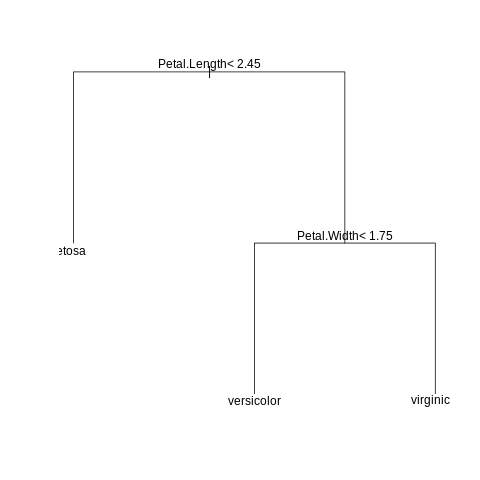

In [68]:
%%R
# 교차타당성 오차를 최소화하는 Tree로 가지치기(pruning)
opt <- which.min(c$cptable[, "xerror"])
cp <- c$cptable[opt,"CP"]
prune.c <- prune(c, cp=cp)
plot(prune.c)
text(prune.c)


위의 결과를 보면 이전과 다른 결과가 출력되지는 않았다. 데이터셋이 단순한 특성이 있기에 그럴 것이다. 

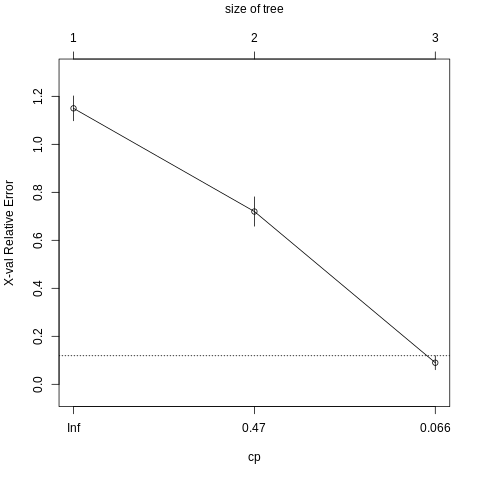

In [69]:
%%R
# CP(cost-complexity parameter) 그래프
plotcp(c)

 위의 경우는 cross validation error에 따른 cp값을 나타낸 것이다. 유의수준 아래로 내려온 cp는 size=3일때이기에 size=3의 tree가 가장 적당하다. 

# 결측치 확인 및 처리 : is.na(), sum(is.na()). na.rm = TURE, na.omit(), complete.cases()

외부 텍스트 파일로 대용량의 데이터 셋을 R로 불러들이고 나면 가장 먼저 하는 것이 str()로 데이터 구조 파악하기, head(), tail()로 데이터 몇 개 미리보기, 그 다음에 하는 것이 바로 결측값 확인 및 처리, 특이값/영향치 확인 및 처리 등의 탐색적 데이터 분석입니다.

 

R에서 결측값이 들어있는 상태에서 통계 분석을 진행하면 NA 라는 결과가 나올 뿐, 원하는 결과를 얻지 못합니다.  그리고 대부분의 R 통계 함수에는 옵션으로 "na.rm = TRUE" 라는 옵션을 제공해서 결측값을 통계량 계산할 때 포함하지 말지를 선택할 수 있게 해줍니다.

## 결측값이 포함되어 있는지 확인하는 방법 : in.na()

위의 벡터처럼 구성요소 갯수가 몇 개 안될 경우 is.na() 한 후에 TRUE, FALSE 논리형 값을 눈으로 보고 확인할 수 있습니다. 하지만 아래의 Cars93 데이터 프레임처럼 변수 갯수도 많고, 관측치 갯수도 많은 경우 (대부분의 실무에서 쓰는 데이터 셋은 이처럼 변수도 많고 관측치도 많지요) is.na() 함수만 가지고서는 아무래도 결측치 현황을 파악하는데 무리가 있습니다.

 


In [70]:
%%R
install.packages("MASS")
library(MASS)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/MASS_7.3-54.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 506246 bytes (494 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [71]:
%%R
is.na(Cars93)

   Manufacturer Model  Type Min.Price Price Max.Price MPG.city MPG.highway
1         FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
2         FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
3         FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
4         FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
5         FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
6         FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
7         FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
8         FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
9         FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
10        FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
11        FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
12        FALSE FALSE FALSE     FALSE FALSE     FALSE    FALSE       FALSE
13        FALSE FALSE FAL

(2) 결측값이 총 몇개인지 계산하는 방법 : sum(is.na())

In [72]:
%%R
# Cars93 데이터 프레임에 결측값 갯수 총 합계 구하기.
sum(is.na(Cars93))

[1] 13


In [73]:
%%R
# Cars93 의 각 변수별로 결측값 개수 구하기 (27개 중에서 4개만 예시로 함)
sum(is.na(Cars93$Manufacturer)) 

[1] 0


In [74]:
%%R
sum(is.na(Cars93$Price)) 

[1] 0


In [75]:
%%R
sum(is.na(Cars93$Rear.seat.room)) 

[1] 2


In [76]:
%%R
sum(is.na(Cars93$Luggage.room)) 

[1] 11


colSums() 함수를 사용하면 데이터 프레임 내 다수 변수들에 대해서 한번에 각 개별 변수별 결측값의 개수 합계를 구할 수 있습니다. 바로 위에서 개별 함수별로 일일이 sum(is.na(Cars93$Manufacturer))...이런 식으로 변수의 개수만큼 쓰는 것을 colSums() 함수로는 한줄이면 해결할 수 있으니 훨씬 편합니다. 

In [77]:
%%R
colSums(is.na(Cars93))

      Manufacturer              Model               Type          Min.Price 
                 0                  0                  0                  0 
             Price          Max.Price           MPG.city        MPG.highway 
                 0                  0                  0                  0 
           AirBags         DriveTrain          Cylinders         EngineSize 
                 0                  0                  0                  0 
        Horsepower                RPM       Rev.per.mile    Man.trans.avail 
                 0                  0                  0                  0 
Fuel.tank.capacity         Passengers             Length          Wheelbase 
                 0                  0                  0                  0 
             Width        Turn.circle     Rear.seat.room       Luggage.room 
                 0                  0                  2                 11 
            Weight             Origin               Make 
                 0

(3) 결측값을 통계 분석 시 제외(미포함) : na.rm = TRUE

In [78]:
%%R
sum(Cars93$Luggage.rom, na.rm = TRUE)

[1] 0


In [79]:
%%R
mean(Cars93$Luggage.rom, na.rm = TRUE)

[1] NA


(4) 결측값이 들어 있는 행 전체를 데이터 셋에서 제거

a.rm = TRUE 옵션은 원래의 데이터 셋은 그대로 둔채 통계량 계산할 때만 포함하지 않게 됩니다. 따라서 다수의 통계 함수 혹은 다수의 변수에 통계 함수를 사용해야 하는 경우 매번 na.rm = TRUE 옵션을 설정해주는게 번거로울 수 있겠지요?  차라리 원래 데이터 셋에서 결측값을 제거해버리면 되겠다는 생각이 드셨을 겁니다.

 

결측값이 들어있는 행을 통째로 무식하게 제거하는 함수가 na.omit()이며, 좀더 예리하게 특정 행과 열을 지정해서 그곳에 결측값이 있는 경우만 메스로 정밀 수술하는 함수가 complete.cases()가 되겠습니다.

In [80]:
%%R
Cars93_1 <-na.omit(Cars93)
str(Cars93_1)

'data.frame':	82 obs. of  27 variables:
 $ Manufacturer      : Factor w/ 32 levels "Acura","Audi",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model             : Factor w/ 93 levels "100","190E","240",..: 49 56 9 1 6 24 54 74 73 35 ...
 $ Type              : Factor w/ 6 levels "Compact","Large",..: 4 3 1 3 3 3 2 2 3 2 ...
 $ Min.Price         : num  12.9 29.2 25.9 30.8 23.7 14.2 19.9 22.6 26.3 33 ...
 $ Price             : num  15.9 33.9 29.1 37.7 30 15.7 20.8 23.7 26.3 34.7 ...
 $ Max.Price         : num  18.8 38.7 32.3 44.6 36.2 17.3 21.7 24.9 26.3 36.3 ...
 $ MPG.city          : int  25 18 20 19 22 22 19 16 19 16 ...
 $ MPG.highway       : int  31 25 26 26 30 31 28 25 27 25 ...
 $ AirBags           : Factor w/ 3 levels "Driver & Passenger",..: 3 1 2 1 2 2 2 2 2 2 ...
 $ DriveTrain        : Factor w/ 3 levels "4WD","Front",..: 2 2 2 2 3 2 2 3 2 2 ...
 $ Cylinders         : Factor w/ 6 levels "3","4","5","6",..: 2 4 4 4 2 2 4 4 4 5 ...
 $ EngineSize        : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 5.7 3.

처음에 Cars93이  "'data.frame': 93 obs. of  27 variables:", 즉 93개의 관측치가 있었는데요,

na.omit(Cars93) 함수를 적용한 후에 Cars93_1 이라는 이름으로 새로 저장해서 str()로 데이터 구조를 보니 "'data.frame': 82 obs. of  27 variables:", 즉 82개 관측치로 총 11개 관측치가 줄어들었음을 알 수 있습니다. 결측값이 하나라도 들어있는 행 11개가 통째로 삭제되어 버렸기 때문입니다.

 

위의 예처럼 결측값이 들어있는 행을 통째로 삭제할 때는 만약의 사태를 대비해서 원본은 그대로 유지하고, 행을 삭제한 데이터 셋을 별도의 이름으로 저장해서 분석을 진행하는 것을 추천합니다.

(5) 특정 행과 열에 결측값이 들어있는 행을 데이터 셋에서 제거 : complete.cases()

In [81]:
%%R
sum(is.na(Cars93))

[1] 13


In [82]:
%%R
# Cars93 데이터 프레임의 "Rear.seat.room" 칼럼 내 결측값이 있는 행 전체 삭제

Cars93_2 <- Cars93[ complete.cases(Cars93[ , c("Rear.seat.room")]), ]
sum(is.na(Cars93_2))

[1] 9


In [83]:
%%R

# Cars93 데이터 프레임의 23~24번째 칼럼 내 결측값이 있는 행 전체 삭제

Cars93_3 <- Cars93[ complete.cases(Cars93[ , c(23:24)]), ]
sum(is.na(Cars93_3))

[1] 0


In [84]:
%%R
dim(Cars93_3) # 관측값이 82개로서 11개 줄어듬

[1] 82 27


In [85]:
%%R
str(Cars93_3) # 관측값이 82개로서 11개 줄어듬

'data.frame':	82 obs. of  27 variables:
 $ Manufacturer      : Factor w/ 32 levels "Acura","Audi",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model             : Factor w/ 93 levels "100","190E","240",..: 49 56 9 1 6 24 54 74 73 35 ...
 $ Type              : Factor w/ 6 levels "Compact","Large",..: 4 3 1 3 3 3 2 2 3 2 ...
 $ Min.Price         : num  12.9 29.2 25.9 30.8 23.7 14.2 19.9 22.6 26.3 33 ...
 $ Price             : num  15.9 33.9 29.1 37.7 30 15.7 20.8 23.7 26.3 34.7 ...
 $ Max.Price         : num  18.8 38.7 32.3 44.6 36.2 17.3 21.7 24.9 26.3 36.3 ...
 $ MPG.city          : int  25 18 20 19 22 22 19 16 19 16 ...
 $ MPG.highway       : int  31 25 26 26 30 31 28 25 27 25 ...
 $ AirBags           : Factor w/ 3 levels "Driver & Passenger",..: 3 1 2 1 2 2 2 2 2 2 ...
 $ DriveTrain        : Factor w/ 3 levels "4WD","Front",..: 2 2 2 2 3 2 2 3 2 2 ...
 $ Cylinders         : Factor w/ 6 levels "3","4","5","6",..: 2 4 4 4 2 2 4 4 4 5 ...
 $ EngineSize        : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 5.7 3.

(6) 결측값을 다른 값으로 대체 : datasets$var[is.na(dataset$var)] <- new_value

In [86]:
%%R
Cars93$Luggage.room

 [1] 11 15 14 17 13 16 17 21 14 18 14 13 14 13 16 NA NA 20 NA 15 14 17 11 13 14
[26] NA 16 11 11 15 12 12 13 12 18 NA 18 21 10 11  8 12 14 11 12  9 14 15 14  9
[51] 19 22 16 13 14 NA NA 12 15  6 15 11 14 12 14 NA 14 14 16 NA 17  8 17 13 13
[76] 16 18 14 12 10 15 14 10 11 13 15 NA 10 NA 14 15 14 15


In [87]:
%%R
sum(is.na(Cars93$Luggage.room))

[1] 11


In [88]:
%%R
# Luggage.room 변수 내 결측값을 '0'으로 대체

Cars93_4 <- Cars93
Cars93_4$Luggage.room[is.na(Cars93_4$Luggage.room)] <- 0
Cars93_4$Luggage.room



 [1] 11 15 14 17 13 16 17 21 14 18 14 13 14 13 16  0  0 20  0 15 14 17 11 13 14
[26]  0 16 11 11 15 12 12 13 12 18  0 18 21 10 11  8 12 14 11 12  9 14 15 14  9
[51] 19 22 16 13 14  0  0 12 15  6 15 11 14 12 14  0 14 14 16  0 17  8 17 13 13
[76] 16 18 14 12 10 15 14 10 11 13 15  0 10  0 14 15 14 15


sum(is.na(Cars93$Luggage.room)) 함수를 사용해 Cars93의 Luggage.room 변수에 보면 11개의 결측값이 있음을 알 수 있습니다.  Luggage.room 변수 내 결측값을 indexing 기법을 활용해서 '0'로 대체하는 방법이 위의 예제가 되겠습니다.

 

물론 '0'이 아니라 다른 값으로도 대체가 가능합니다.  아래의 예제에서는 결측값을 미포함(na.rm = TRUE)했을 때의 Luggage.room의 평균값으로 결측값을 대체하여 보도록 하겠습니다.

In [89]:
%%R
Cars93_5 <- Cars93
Cars93_5$Luggage.room[is.na(Cars93_5$Luggage.room)] <- mean(Cars93_5$Luggage.room, na.rm = TRUE)
sum(is.na(Cars93_5$Luggage.room))
Cars93_5$Luggage.room


 [1] 11.00000 15.00000 14.00000 17.00000 13.00000 16.00000 17.00000 21.00000
 [9] 14.00000 18.00000 14.00000 13.00000 14.00000 13.00000 16.00000 13.89024
[17] 13.89024 20.00000 13.89024 15.00000 14.00000 17.00000 11.00000 13.00000
[25] 14.00000 13.89024 16.00000 11.00000 11.00000 15.00000 12.00000 12.00000
[33] 13.00000 12.00000 18.00000 13.89024 18.00000 21.00000 10.00000 11.00000
[41]  8.00000 12.00000 14.00000 11.00000 12.00000  9.00000 14.00000 15.00000
[49] 14.00000  9.00000 19.00000 22.00000 16.00000 13.00000 14.00000 13.89024
[57] 13.89024 12.00000 15.00000  6.00000 15.00000 11.00000 14.00000 12.00000
[65] 14.00000 13.89024 14.00000 14.00000 16.00000 13.89024 17.00000  8.00000
[73] 17.00000 13.00000 13.00000 16.00000 18.00000 14.00000 12.00000 10.00000
[81] 15.00000 14.00000 10.00000 11.00000 13.00000 15.00000 13.89024 10.00000
[89] 13.89024 14.00000 15.00000 14.00000 15.00000


7) 데이터프레임의 모든 행의 결측값을 특정 값(가령, '0')으로 일괄 대체 

: dataset[is.na(dataset)] <- 0

In [90]:
%%R

Cars93_6 <- Cars93
# counting the number of missing values in Cars93 dataset
sum(is.na(Cars93_6)) # 13
# converting the missing value in Cars93 dataframe to '0'
Cars93_6[is.na(Cars93_6)] <- 0

# counting the number of missing values in Cars93 dataset
sum(is.na(Cars93_6)) # 0



[1] 0


이상치 역시 분석 결과를 왜곡시키기 때문에 결측 처리 후에 제외하고 분석해야 좀 더 정확한 결과를 가져올 수 있다.

 

이상치의 종류에는 대표적으로 두 가지가 있는데, 아예 존재할 수 없는 값 혹은 극단적인 값이다. 

 

전자의 예로는 성별 변수에 3이라는 값이 들어간 것이며, 후자의 예로는 몸무게 변수에 200이라는 값이 들어간 것이다.

성별 변수에 3이라는 값이 들어간 것은 논리적으로 존재할 수 없으므로 바로 결측 처리를 하고, 몸무게 변수에 200이라는 값이 들어갔으면, 정상 범위의 기준을 정해서 결측 처리를 함으로써 해결할 수 있다.

 

 

그렇다면 극단치의 기준은 어떻게 정할까?

통계적으로는 상하위 0.3% 나 상자 그림 1.5 IQR을 벗어나면 극단치로 판단한다.

mpg 데이터로 예를 들어보자.

<img src = 
'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fqlza7%2FbtqwTw0Ibbu%2FyX68PMhhSGvQCBbna8UKGk%2Fimg.png'>

     [,1]
[1,]   12
[2,]   18
[3,]   24
[4,]   27
[5,]   37


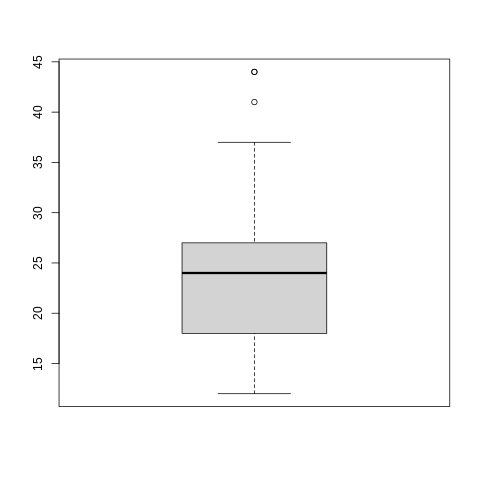

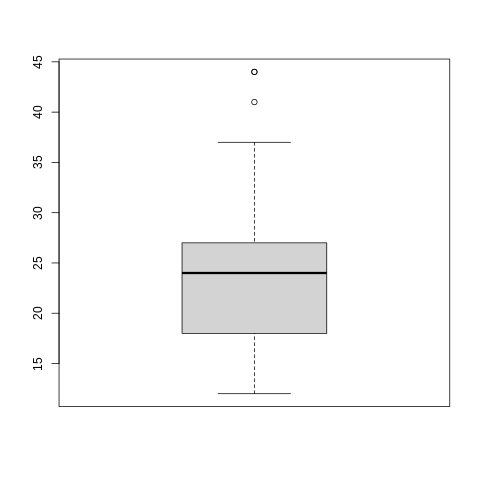

In [91]:
%%R
mpg <- as.data.frame(ggplot2::mpg)
boxplot(mpg$hwy) 
boxplot(mpg$hwy)$stats #상자그림 통계치 출력
#[1,] : 최소값
#[2,] : 1분위수(25%)
#[3,] : 평균(50%)
#[4,] : 3사분위수(75%)
#[5,] : 최대값


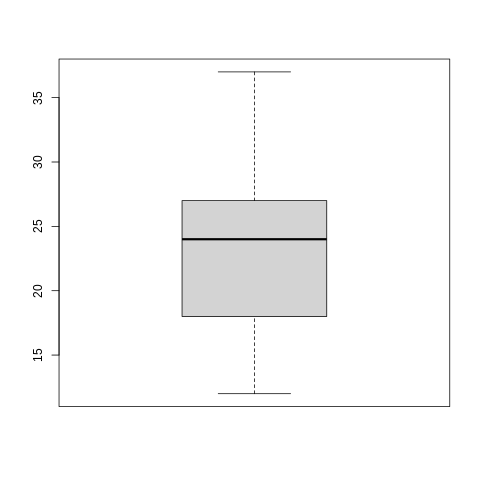

In [93]:
# boxplot(mpg$hwy)$stats 실행 결과 에서 12미만이거나 37을 초과하는 경우는 이상할 데이터일 학률이 매우 높다

%%R

mpg$hwy<-ifelse(mpg$hwy<12 | mpg$hwy>37, NA,mpg$hwy)
boxplot(mpg$hwy)